<a href="https://colab.research.google.com/github/agltkn/Assignments/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [25]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [26]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [27]:
x_train[3].shape

(28, 28)

In [28]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

In [29]:
y_train[5]

2

In [30]:
y_train.shape

(60000,)

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [33]:
pd.Series(y_test.flatten()).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

In [34]:
# classes = {0 : "T-shirt/top",
#            1 : "Trouser",
#            2 : "Pullover",
#            3 : "Dress",
#            4 : "Coat",
#            5 : "Sandal",
#            6 : "Shirt",
#            7 : "Sneaker",
#            8 : "Bag",
#            9 : "Ankle boot"}

In [35]:
# plt.figure(figsize=(20, 20))
# for i in range(64):
#     rand_index = int(np.random.randint(low=0, high=50000, size=1))
#     plt.subplot(8, 8, i+1)
#     plt.axis('off')
#     plt.title(classes[int(y_train[rand_index])])
#     plt.imshow(x_train[rand_index])

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [36]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

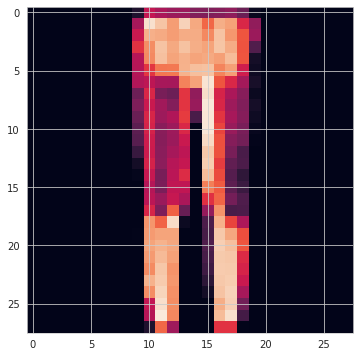

In [37]:
plt.imshow(x_test[3])

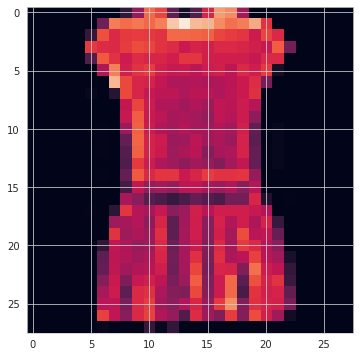

In [38]:
plt.imshow(x_train[3])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_test.shape

(10000, 28, 28)

In [41]:
x_train[3].max()

255

In [42]:
x_test[3].max()

255

In [43]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [44]:
x_train[3].max()

1.0

In [45]:
x_test[3].min()

0.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [46]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [47]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [48]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [49]:
y_train.shape

(60000,)

In [50]:
from tensorflow.keras.utils import to_categorical

In [51]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

In [52]:
y_test.shape

(10000, 10)

In [53]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor='accuracy', mode = "max" , patience=2, restore_best_weights = True)

In [56]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0         
                                                                 
 dense (Dense)               (None, 128)               1

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [58]:
model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 74s 38ms/step - loss: 0.4195 - accuracy: 0.8481 - val_loss: 0.3435 - val_accuracy: 0.8708
Epoch 2/50
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2802 - accuracy: 0.8986 - val_loss: 0.2821 - val_accuracy: 0.8982
Epoch 3/50
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2418 - accuracy: 0.9133 - val_loss: 0.3306 - val_accuracy: 0.8902
Epoch 4/50
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2209 - accuracy: 0.9195 - val_loss: 0.3094 - val_accuracy: 0.8947
Epoch 5/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2049 - accuracy: 0.9268 - val_loss: 0.2640 - val_accuracy: 0.9129
Epoch 6/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1935 - accuracy: 0.9312 - val_loss: 0.2874 - val_accuracy: 0.9069
Epoch 7/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1861 - accuracy: 0.9333 - val_loss: 0.2517 -

**TASK 7: Plot values of metrics you used in your model.**

In [59]:
summary = pd.DataFrame(model.history.history)
summary.head(15)

,loss,accuracy,val_loss,val_accuracy
0,0.420,0.848,0.343,0.871
1,0.280,0.899,0.282,0.898
2,0.242,0.913,0.331,0.890
3,0.221,0.920,0.309,0.895
4,0.205,0.927,0.264,0.913
5,0.193,0.931,0.287,0.907
6,0.186,0.933,0.252,0.914
7,0.179,0.937,0.278,0.912
8,0.174,0.938,0.272,0.905
9,0.169,0.941,0.284,0.910


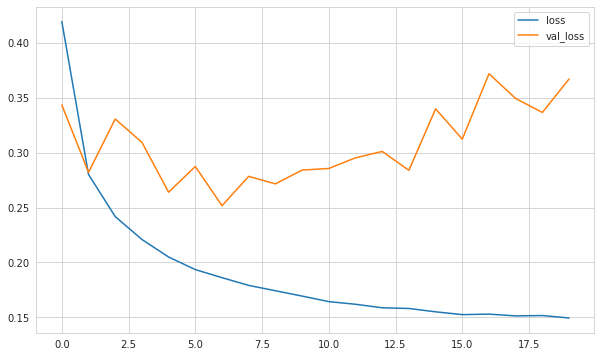

In [60]:
summary[["loss", "val_loss"]].plot();

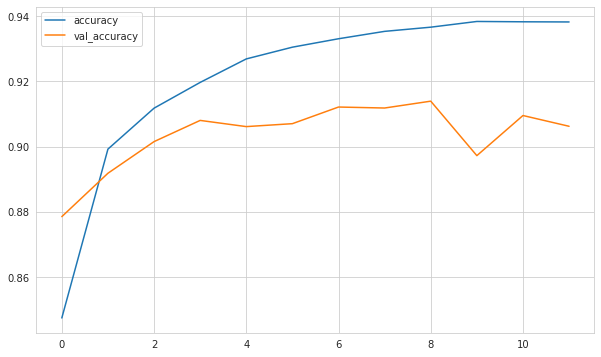

In [56]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [62]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3493 - accuracy: 0.9096


[0.34930410981178284, 0.909600019454956]

In [63]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34930410981178284
Test accuracy: 0.909600019454956


In [64]:
pred_prob = model.predict(x_test)
pred_prob[0]

array([1.5955736e-09, 2.6561596e-15, 2.0512596e-09, 2.7249614e-13,
       4.7138418e-11, 6.2046529e-06, 1.3115221e-09, 4.4094209e-05,
       7.9680365e-07, 9.9994886e-01], dtype=float32)

In [65]:
pred_prob.shape

(10000, 10)

In [66]:
np.argmax(pred_prob[0])

9

In [68]:
# y_predd = np.argmax(pred_prob, axis=1)
# y_predd

array([9, 2, 1, ..., 8, 1, 5])

In [69]:
y_test_arg = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test),axis=1)
print('classification_report')
print(classification_report(y_test_arg, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.83      0.87      0.85      1000
           3       0.90      0.93      0.91      1000
           4       0.84      0.89      0.86      1000
           5       0.98      0.97      0.97      1000
           6       0.79      0.68      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [68]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [70]:
print(confusion_matrix(y_test_arg, y_pred))

[[850   0  24  28   2   1  85   0   9   1]
 [  0 986   1  12   0   0   0   0   1   0]
 [ 15   1 874   6  62   0  42   0   0   0]
 [ 16   2  11 930  26   1  13   0   1   0]
 [  0   1  54  22 890   0  32   0   1   0]
 [  0   0   0   0   0 967   0  23   1   9]
 [113   2  84  35  74   1 679   0  12   0]
 [  0   0   0   0   0   7   0 977   2  14]
 [  1   0   0   1   5   5   4   1 983   0]
 [  0   0   0   0   0   5   0  35   0 960]]


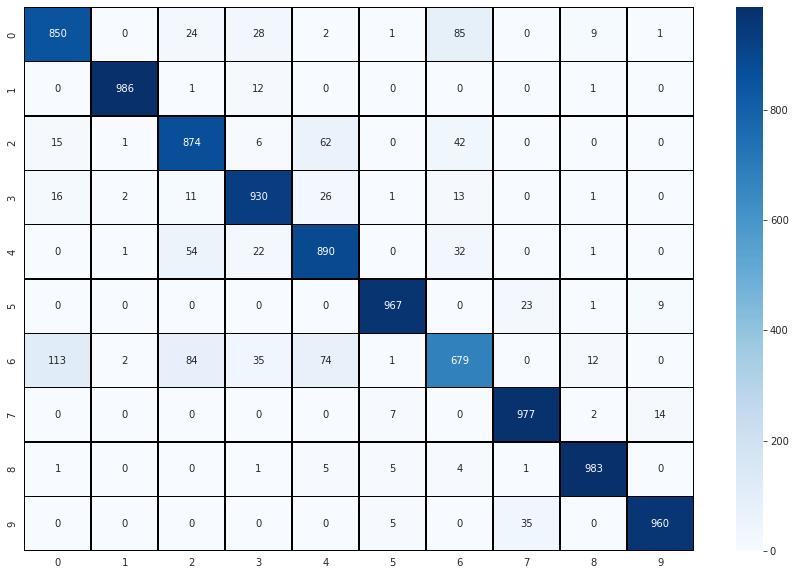

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test_arg, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 10})

In [72]:
y_test_arg != y_pred 

array([False, False, False, ..., False, False, False])

In [73]:
(y_test_arg != y_pred).sum() 

904

## Prediction

In [74]:
my_pic = x_test[10]

In [75]:
my_pic.shape

(28, 28, 1)

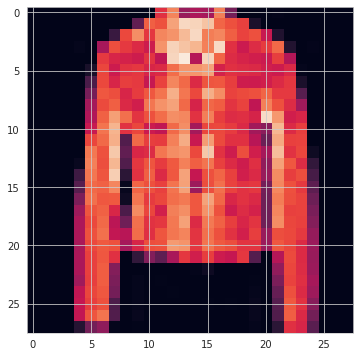

In [78]:
plt.imshow(my_pic.reshape(28,28))

In [79]:
prediction1 = model.predict(my_pic.reshape(1,28,28,1))
prediction1

array([[2.8201356e-07, 1.9455787e-07, 2.2278791e-03, 7.6839424e-11,
        9.9762005e-01, 8.3872123e-08, 1.4619422e-04, 2.4378263e-08,
        1.3903993e-08, 5.1956295e-06]], dtype=float32)

In [80]:
np.argmax(prediction1)

4

In [82]:
model.save("assignment2_D1201_ahmet.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___